In [ ]:
#https://youtu.be/NGy8SJfzvmg
# Hongdi Li

# To make the working dataframe

In [156]:
import pandas as pd
# importing pandas module

import matplotlib.pyplot as plt

df_w= pd.read_csv('winequality-white.csv',sep=';')
df_r=pd.read_csv('winequality-red.csv',sep=';')
# add sep=';' since the original csv file separate different categories with semicolons

df_w['wine_type']=1
df_r['wine_type']=0
# Since we want make two data together,
# need add the different wine type, 1 is white wine, 0 is red wine



# Pre-processing

### Check if have the missing value

In [3]:
total_missing_w=df_w.isna().sum().sum()
print("total number of missing values in white wine df: ",total_missing_w)
# total number of missing values

total_missing_r=df_r.isna().sum().sum()
print("total number of missing values in red wine df: ",total_missing_r)
# total number of missing values


total number of missing values in white wine df:  0
total number of missing values in red wine df:  0


### Check if have the outliers

In [4]:
df_wo=df_w.copy()
df_ro=df_r.copy()

for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    #z = (X — μ) / σ use z-score to check if there any outliers
    cols = df_wo[col]
    z_score = (cols - cols.mean()) / cols.std()
    # to get the z-score
    df_wo[col] = z_score.abs() > 3.0
    # if |z|>3.0 should be consider as outliers

for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    #z = (X — μ) / σ use z-score to check if there any outliers
    cols = df_ro[col]
    z_score = (cols - cols.mean()) / cols.std()
    # to get the z-score
    df_ro[col] = z_score.abs() > 3.0
    # if |z|>3.0 should be consider as outliers


#I think z-score is an effective way to find outliers,
# by normalizing the data for each column, and setting the threshold for z to [-3,3],
# 99% of the values can be considered normal and 1% as outliers .

In [5]:
df_wo
# the true means the outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,False,False,False,False,False,False,False,False,False,False,False,6,1
1,False,False,False,False,False,False,False,False,False,False,False,6,1
2,False,False,False,False,False,False,False,False,False,False,False,6,1
3,False,False,False,False,False,False,False,False,False,False,False,6,1
4,False,False,False,False,False,False,False,False,False,False,False,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,6,1
4894,False,False,False,False,False,False,False,False,False,False,False,5,1
4895,False,False,False,False,False,False,False,False,False,False,False,6,1
4896,False,False,False,False,False,False,False,False,False,False,False,7,1


In [6]:
df_ro
# the true means the outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,False,False,False,False,False,False,False,False,False,False,False,5,0
1,False,False,False,False,False,False,False,False,False,False,False,5,0
2,False,False,False,False,False,False,False,False,False,False,False,5,0
3,False,False,False,False,False,False,False,False,False,False,False,6,0
4,False,False,False,False,False,False,False,False,False,False,False,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,5,0
1595,False,False,False,False,False,False,False,False,False,False,False,6,0
1596,False,False,False,False,False,False,False,False,False,False,False,6,0
1597,False,False,False,False,False,False,False,False,False,False,False,5,0


In [7]:
i_1=0
#counter

for index, row in df_wo.iterrows():
    #main idea is check the data by row find all outliers value and replace them as the mean value in each columns
    for w in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
        # the quality is like the outcomes, I dont think we should check the outliers for quality
        if row[w] is True:
            df_w.loc[index,w]=df_w[w].mean()
            #replace the outliers by mean
            i_1=i_1+1

print('Number of outliers for df_w:',i_1)
df_w

Number of outliers for df_w: 450


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [8]:
i_2=0
#counter

for index, row in df_ro.iterrows():
    #main idea is check the data by row find all outliers value and replace them as the mean value in each columns
    # same logical with dealing the df_wo
    for w in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
        if row[w] is True:
            df_r.loc[index,w]=df_r[w].mean()
            i_2=i_2+1
print('Number of outliers for df_r:',i_2)
df_r

Number of outliers for df_r: 182


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### Check if have the duplicated row

In [9]:
total_dup_w=df_w.duplicated().sum()
print('total number of duplicated in white wine:'+str(total_dup_w))
# Check and report total number of duplicated in white wine

total_dup_r=df_r.duplicated().sum()
print('total number of duplicated in red wine:'+str(total_dup_r))
# Check and report total number of duplicated in red wine

total number of duplicated in white wine:884
total number of duplicated in red wine:223


In [10]:
df_w[df_w.duplicated()==True]
# report the duplicated rows in white wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,1
39,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.600000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,1
4850,7.0,0.36,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,1
4851,6.4,0.33,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,1
4856,7.1,0.23,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,1


In [11]:
df_r[df_r.duplicated()==True]
# report the duplicated rows in red wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,0


In [12]:
df_w=df_w.drop_duplicates()
df_r=df_r.drop_duplicates()
# delete the duplicates rows

### Make the new dataframe

In [13]:
df=pd.concat([df_w,df_r])

In [141]:
df_w.reset_index(drop=True, inplace=True)
df_r.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
# since we did use duplicated, and concat,
# we have to re doing the index

w=df_w.describe()
r=df_r.describe()
ff=df.describe()

In [142]:
print(w)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4014.000000       4014.000000  4014.000000     4014.000000   
mean        6.811405          0.272673     0.326052        5.886313   
std         0.801302          0.085913     0.104258        4.714091   
min         4.400000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.320000     0.380000        8.800000   
max         9.300000          0.580000     0.690000       20.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4014.000000          4014.000000           4014.000000  4014.000000   
mean      0.043054            34.426780            136.938269     0.993790   
std       0.011712            15.703747             41.966409     0.002807   
min       0.009000             2.000000         

In [143]:
print(r)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1376.000000       1376.000000  1376.000000     1376.000000   
mean        8.262921          0.524073     0.272225        2.396096   
std         1.648989          0.172566     0.194445        0.864409   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.097500        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.636250     0.430000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1376.000000          1376.000000           1376.000000  1376.000000   
mean      0.082142            15.439387             45.910234     0.996706   
std       0.023447             9.415665             30.770625     0.001777   
min       0.012000             1.000000         

In [144]:
print(ff)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5390.000000       5390.000000  5390.000000     5390.000000   
mean        7.181959          0.336853     0.312310        4.995304   
std         1.254018          0.158469     0.135248        4.365252   
min         4.400000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         6.900000          0.290000     0.310000        2.700000   
75%         7.700000          0.400000     0.390000        7.400000   
max        13.500000          1.040000     0.790000       20.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5390.000000          5390.000000           5390.000000  5390.000000   
mean      0.053033            29.579535            113.699943     0.994535   
std       0.023086            16.577509             55.934640     0.002879   
min       0.009000             1.000000         

# Visualization

### Use hist to show some data

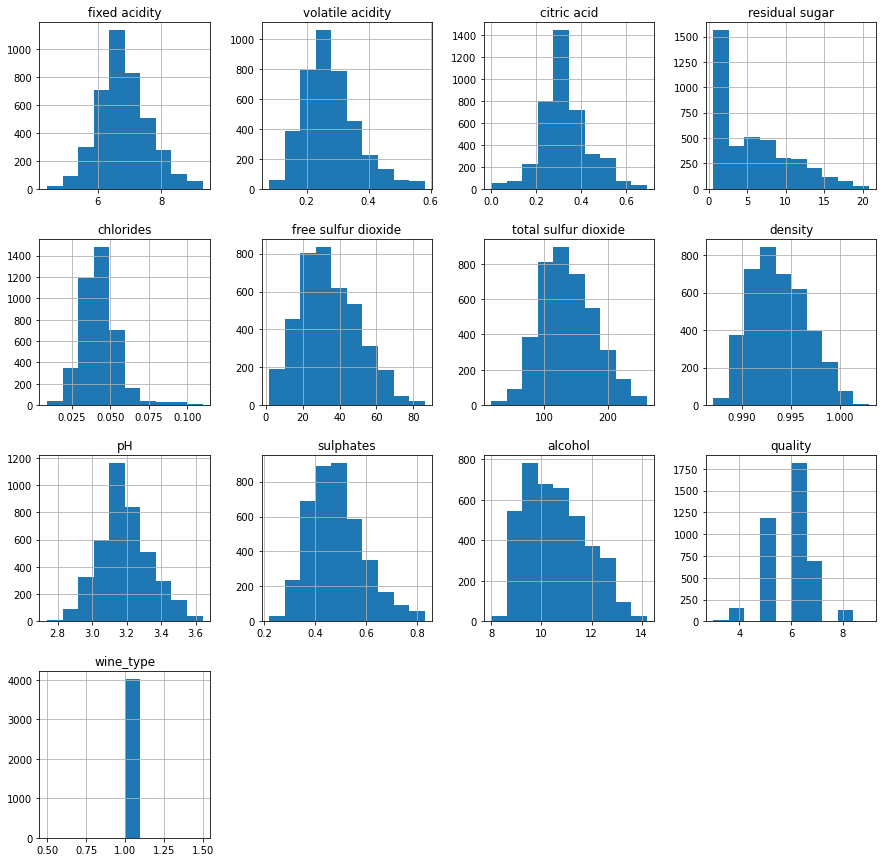

In [15]:
import seaborn as sns
df_w.hist(xlabelsize=10,ylabelsize=10,figsize=(15,15))
plt.show()


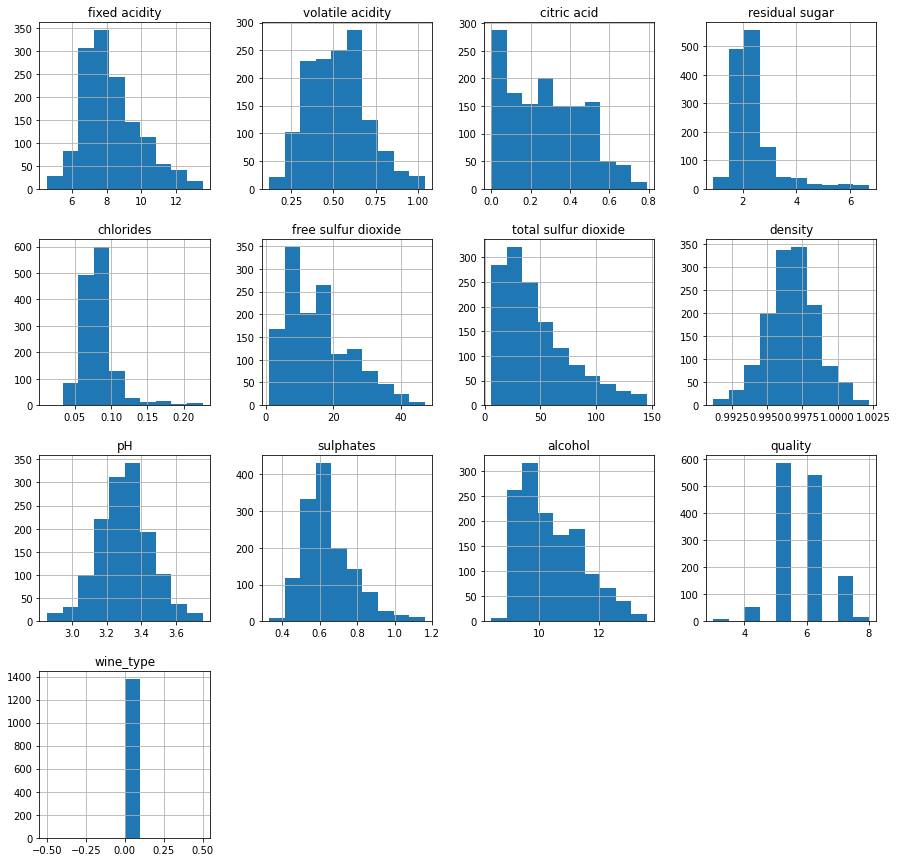

In [16]:
df_r.hist(xlabelsize=10,ylabelsize=10,figsize=(15,15))
plt.show()

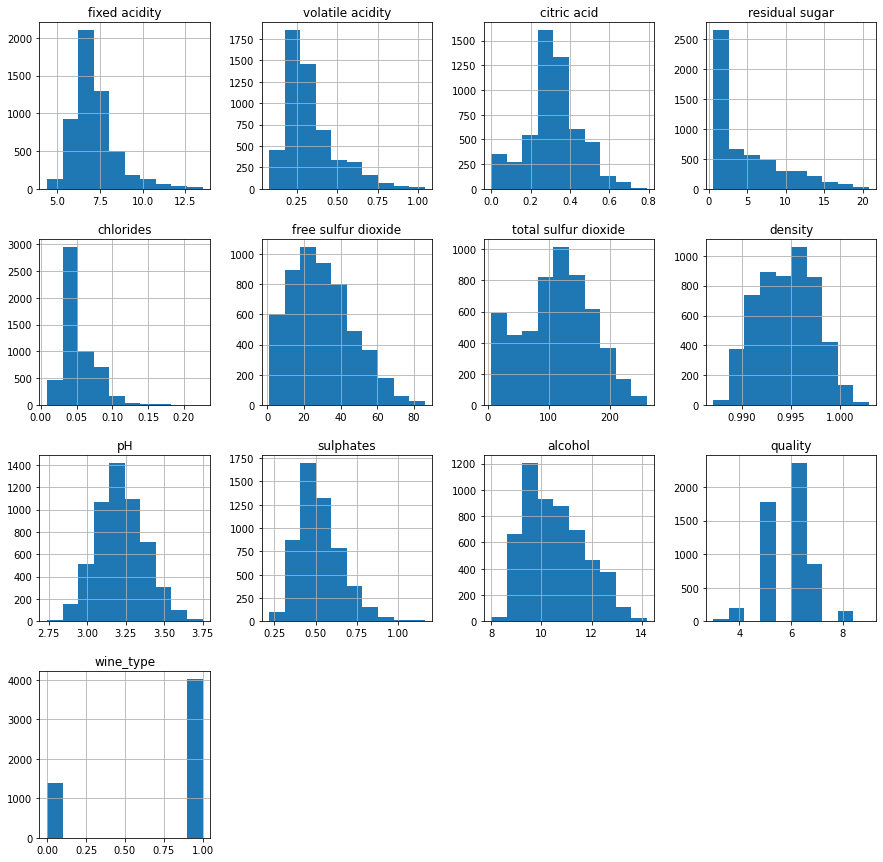

In [17]:
df.hist(xlabelsize=10,ylabelsize=10,figsize=(15,15))
plt.show()

In [18]:
# By look at the graph, seems quality 6 is a important number
#i would like to consider if quality higher or equal 6 as high quality wine
#less than 6 as low quality wine
# Then add column named low_or_high, high with 1, low with 0

for index, row in df_r.iterrows():
        if row['quality']>=6:
            df_r.loc[index,'low_or_high']=1
        else:
            df_r.loc[index,'low_or_high']=0

for index, row in df_w.iterrows():
        if row['quality']>=6:
            df_w.loc[index,'low_or_high']=1
        else:
            df_w.loc[index,'low_or_high']=0

for index, row in df.iterrows():
        if row['quality']>=6:
            df.loc[index,'low_or_high']=1
        else:
            df.loc[index,'low_or_high']=0


C:\Users\Hardi\AppData\Local\Temp\ipykernel_10088\905869552.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r.loc[index,'low_or_high']=0
C:\Users\Hardi\AppData\Local\Temp\ipykernel_10088\905869552.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w.loc[index,'low_or_high']=1


### Use pie to show some data

Text(0.5, 1.0, 'white wine')

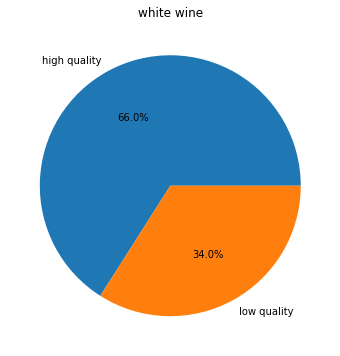

In [19]:
import matplotlib.pyplot  as plt

plt.figure(figsize=(6,6))
size = [len(df_w[df_w['low_or_high']==1]),len(df_w[df_w['low_or_high']==0])]
label=['high quality','low quality']
plt.pie(size,labels=label,autopct='%.1f%%')
plt.title('white wine')

#To show the pesentage of high/low quality wine in white wine

Text(0.5, 1.0, 'Red wine')

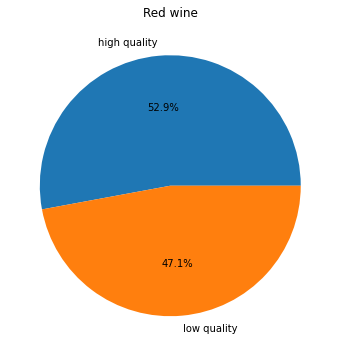

In [20]:
plt.figure(figsize=(6,6))
size = [len(df_r[df_r['low_or_high']==1]),len(df_r[df_r['low_or_high']==0])]
label=['high quality','low quality']
plt.pie(size,labels=label,autopct='%.1f%%')
plt.title('Red wine')

#To show the pesentage of high/low quality wine in red wine

Text(0.5, 1.0, 'total wine')

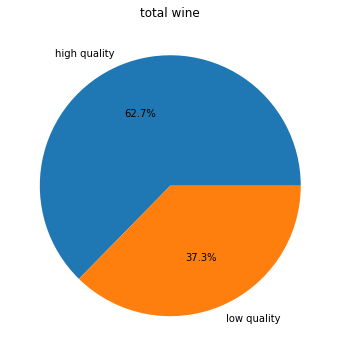

In [21]:
plt.figure(figsize=(6,6))
size = [len(df[df['low_or_high']==1]),len(df[df['low_or_high']==0])]
label=['high quality','low quality']
plt.pie(size,labels=label,autopct='%.1f%%')
plt.title('total wine')

#To show the pesentage of high/low quality wine in total wine

# Machine learning

In [22]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [148]:
x = df.drop(['quality','wine_type','low_or_high'],axis=1)
#drop the useless columns
y = df['low_or_high']
#get the answer

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)
#split the data set to train and test sets

## Normalize data

In [151]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,low_or_high
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1.0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1,1.0


In [152]:

from sklearn.preprocessing import StandardScaler
#use StandardScaler to normalize the data

stand = StandardScaler()
# creating scaler

stand_fit = stand.fit(x_train)

scal_x_train = stand_fit.transform(x_train)
scal_x_test = stand_fit.transform(x_test)
# transformation the data


In [150]:
from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier(random_state=520)
#create model with seeds 666

fit_rnd = rnd.fit(scal_x_train,y_train)
#fit the model

rnd_score = rnd.score(scal_x_test,y_test)
# checking the score

print('score is : ',rnd_score)

score is :  0.7764378478664193


# Impove

In [105]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': range(450,550,20),
   'max_depth' : range(20,40,10),
    'criterion' :['gini', 'entropy']
}
#define the params we want to find the best

In [106]:
CV_rnd = GridSearchCV(estimator=rnd, param_grid=param_grid, cv= 10)
#use GridSearchCV to find the best params
CV_rnd.fit(scal_x_train, y_train)
#fit the set

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=666),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 40, 10),
                         'n_estimators': range(450, 550, 20)})

In [108]:
CV_rnd.best_params_
# get the best params

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 510}

In [131]:
#Re doing the machine learning

rnd1=RandomForestClassifier(n_estimators=510,max_depth=30, criterion='gini',random_state=666)
#use the best params to the RandomForestClassifier model

rnd1.fit(scal_x_train, y_train)
#fit the data
rnd1_score = rnd1.score(scal_x_test,y_test)

In [137]:
print('new score is:',rnd1_score)

new score is: 0.7903525046382189
